In [49]:
import yfinance as yf

# Get input from the user
tickers_input = input("Enter multiple tickers separated by commas (e.g., AFX.DE, NESN.SW, LIN, MDLZ): ")

# Split the input string into individual tickers
tickers = [ticker.strip() for ticker in tickers_input.split(',')]

# Download data for the specified tickers
multpl_stocks = yf.download(tickers,
                            start="2019-05-04",
                            end="2024-04-26")

Enter multiple tickers separated by commas (e.g., AFX.DE, NESN.SW, LIN, MDLZ): AMZN, GOOG, META
[*********************100%%**********************]  3 of 3 completed


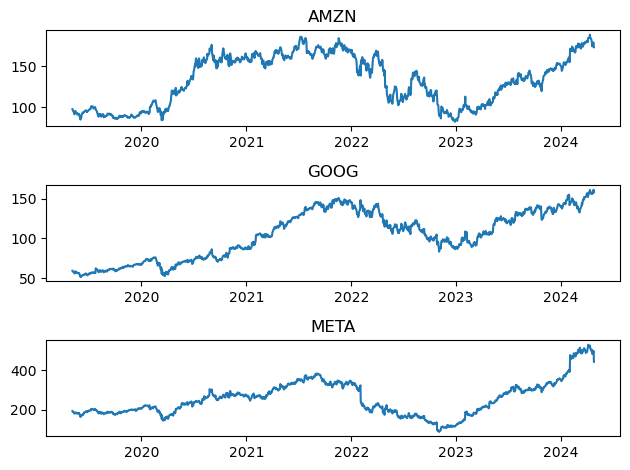

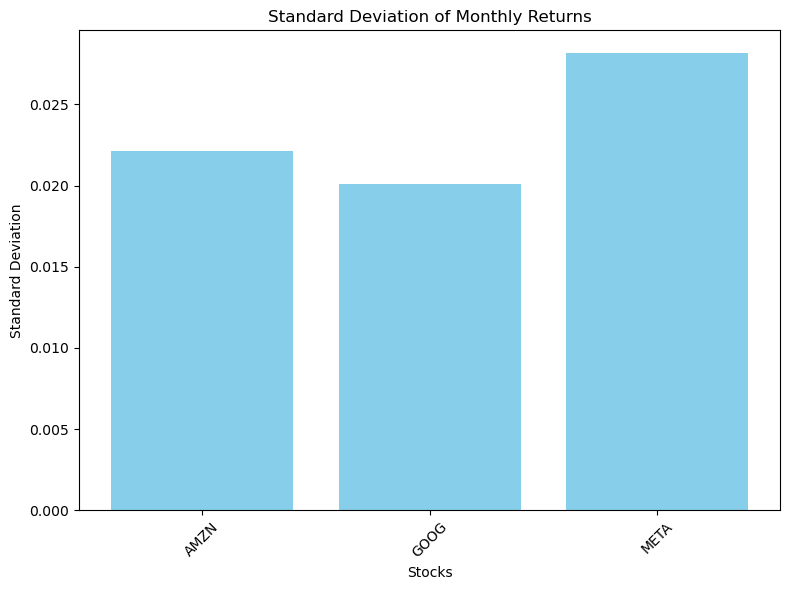

In [50]:
import matplotlib.pyplot as plt

# Assuming you have already obtained multpl_stocks data based on user input

# Create a new figure
fig = plt.figure()

# Determine the number of subplots based on the number of tickers
num_plots = len(tickers)

# Create subplots dynamically based on the number of tickers
for i, ticker in enumerate(tickers, 1):
    ax = fig.add_subplot(num_plots, 1, i)
    ax.plot(multpl_stocks['Close'][ticker])
    ax.set_title(ticker)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

# Calculate the monthly returns for each ticker
monthly_returns = multpl_stocks['Close'].pct_change()



# Get the standard deviation of the inputed stocks
# Assuming std_dev is a pandas Series containing standard deviations of the inputted stocks
std_dev = monthly_returns.std()

# Filter the standard deviations based on inputted tickers
filtered_std_dev = {ticker: std_dev.loc[ticker] for ticker in tickers if ticker in std_dev}

# Extract the stocks and their respective standard deviations
stocks = list(filtered_std_dev.keys())
std_values = list(filtered_std_dev.values())

# Plot the standard deviations
plt.figure(figsize=(8, 6))
plt.bar(stocks, std_values, color='skyblue')
plt.title('Standard Deviation of Monthly Returns')
plt.xlabel('Stocks')
plt.ylabel('Standard Deviation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

  


In [51]:
multpl_stock_daily_returns = multpl_stocks['Adj Close'].pct_change()
multpl_stock_monthly_returns = multpl_stocks['Adj Close'].resample('M').ffill().pct_change()

<Figure size 640x480 with 0 Axes>

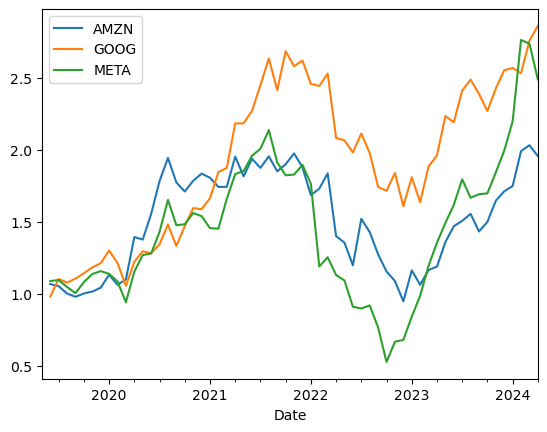

In [52]:
fig = plt.figure()
(multpl_stock_monthly_returns + 1).cumprod().plot()
plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


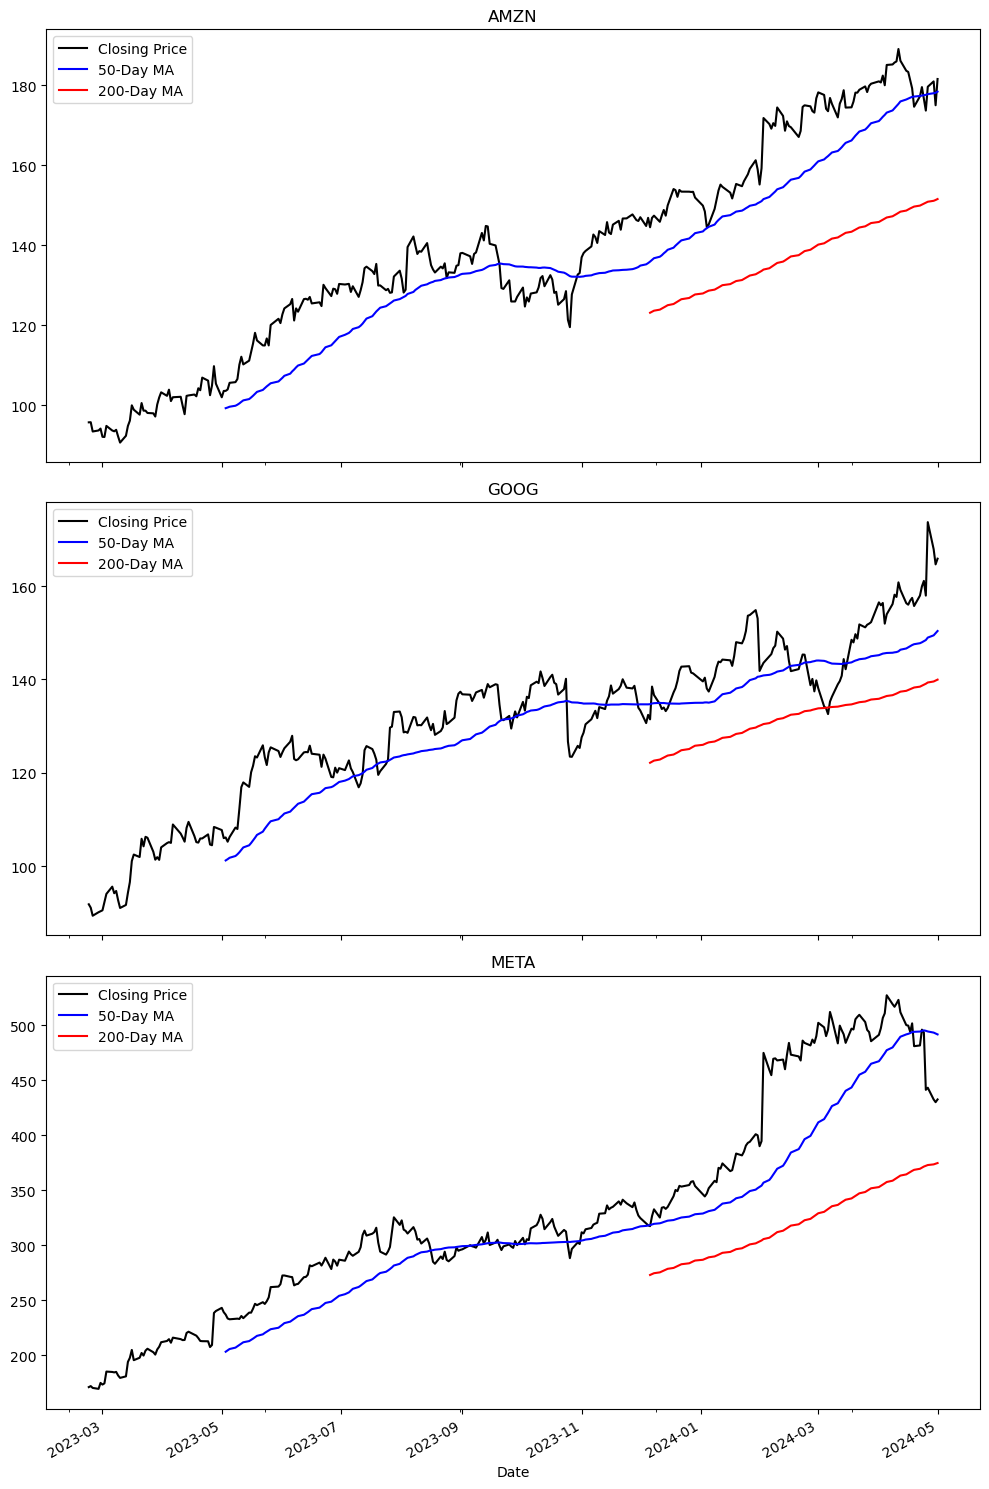

In [53]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

multpl_stocks = {ticker: yf.download(ticker, period='300d') for ticker in tickers} 

fig, axes = plt.subplots(nrows=len(tickers), ncols=1, figsize=(10, 15), sharex=True)

    
for ax, (ticker, df) in zip(axes, multpl_stocks.items()):
    df['Close'].plot(ax=ax, label='Closing Price', color='black')
    df['50_MA'] = df['Close'].rolling(window=50).mean()
    df['50_MA'].plot(ax=ax, label='50-Day MA', color='blue')
    df['200_MA'] = df['Close'].rolling(window=200).mean()
    df['200_MA'].plot(ax=ax, label='200-Day MA', color='red')
    
    ax.set_title(ticker)
    ax.legend()

plt.tight_layout()
plt.savefig("simplefinance.png", dpi=200)
plt.show()
